In [22]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

toy_dataset = [
    ['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
    ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']
]

te = TransactionEncoder()
te_ary = te.fit(toy_dataset).transform(toy_dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
    support                       itemsets
0       0.4                        (Dress)
1       0.4                     (Earrings)
2       0.6                          (Hat)
3       0.4                        (Heels)
4       0.8                        (Pants)
5       0.8                        (Scarf)
6       0.6                        (Skirt)
7       0.4                     (Sneakers)
8       0.4                 (Dress, Heels)
9       0.4                 (Dress, Scarf)
10      0.4              (Earrings, Scarf)
11      0.4                   (Pants, Hat)
12      0.4                   (Scarf, Hat)
13      0.4                   (Hat, Skirt)
14      0.4                (Sneakers, Hat)
15      0.4                 (Scarf, Heels)
16      0.6                 (Pants, Scarf)
17      0.6                 (Pants, Skirt)
18      0.4              (Pants, Sneakers)
19      0.4                 (Scarf, Skirt)
20      0.4              (Sneakers, Skirt)
21      0.4          (Dress, Scarf,

In [23]:
df = pd.read_csv('Market_Basket_Optimisation.csv')

In [24]:
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [26]:
df.isnull().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [27]:
# Load the dataset manually

# Open the groceries.csv file in read mode ('r')
with open("Market_Basket_Optimisation.csv", 'r') as file:
    
    # Read the file line by line, strip any leading/trailing whitespace, 
    # and split each line by commas to create a list of items (i.e., a transaction)
    data = [line.strip().split(',') for line in file]

# Display the first five transactions (each transaction is a list of items)
for transaction in data[:5]:
    print(transaction)

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']
['burgers', 'meatballs', 'eggs']
['chutney']
['turkey', 'avocado']
['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']


In [29]:
te = TransactionEncoder()
te_data = te.fit(data).transform(data)

df = pd.DataFrame(te_data, columns=te.columns_)

df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
# Set a minimum support value to find frequent itemsets that appear in at least 1% of transactions
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Display the frequent itemsets found
frequent_itemsets.head()

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)


In [54]:
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: list(x))

C:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



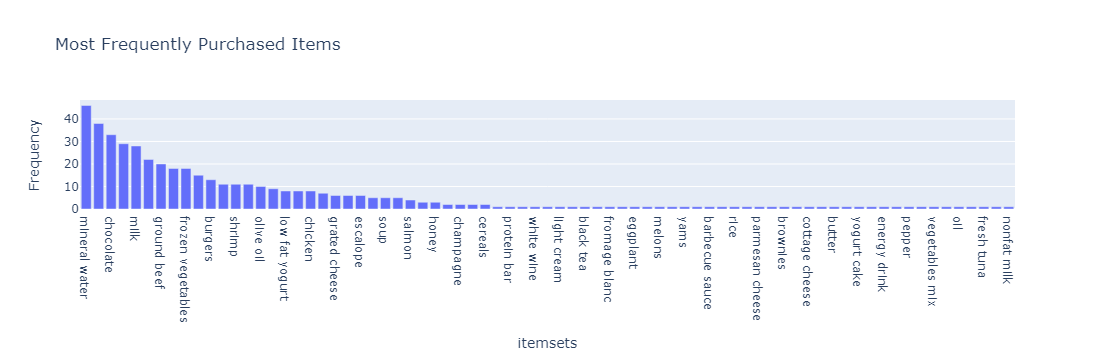

In [55]:
import matplotlib.pyplot as plt
import plotly.express as px

item_counts = frequent_itemsets['itemsets'].explode().value_counts()

fig = px.bar(x=item_counts.index, y=item_counts.values, labels={'x':'itemsets', 'y':'Frequency'}, title='Most Frequently Purchased Items')
fig.show()

C:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



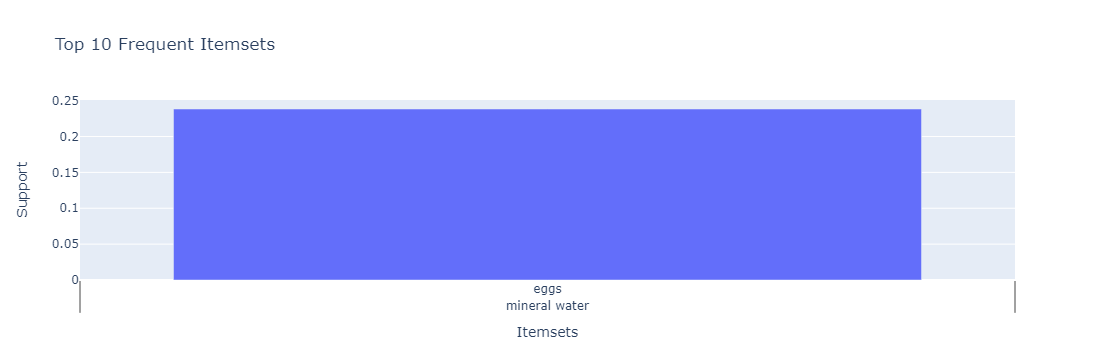

In [58]:
import plotly.express as px

# Alternatively, convert to lists if you prefer
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: list(x))

# Sort the DataFrame by 'support' in descending order
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# Create the bar plot
fig = px.bar(
    frequent_itemsets.head(10),
    x='itemsets',
    y='support',
    title='Top 10 Frequent Itemsets',
    labels={'itemsets': 'Itemsets', 'support': 'Support'},
    hover_data=['itemsets', 'support']
)

# Show the plot
fig.show()

In [59]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
2,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
3,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
4,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943


In [60]:
# We can filter the rules to focus on those with high confidence or lift values.
strong_rules = rules[(rules['lift'] > 1.2) & (rules['confidence'] > 0.5)]

# Sort the rules by lift, in descending order
strong_rules = strong_rules.sort_values(by='lift', ascending=False)

# Display the filtered rules
strong_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
60,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,0.540342
48,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,0.537969


In [61]:
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x))
rules['consequents'] = rules['consequents'].apply(lambda x: list(x))

C:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



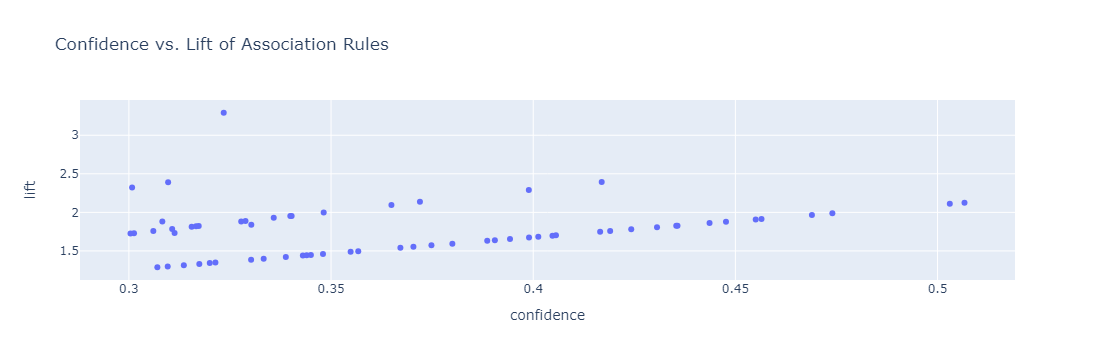

In [62]:
fig = px.scatter(rules, x='confidence', y='lift', hover_data=['antecedents', 'consequents'], title='Confidence vs. Lift of Association Rules')
fig.show()

In [63]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

rules = rules.sort_values(by='lift', ascending=False)
print(rules.head(20))

                           antecedents      consequents  antecedent support  \
29                     (herb & pepper)    (ground beef)            0.049460   
26        (ground beef, mineral water)      (spaghetti)            0.040928   
50  (frozen vegetables, mineral water)           (milk)            0.035729   
35                              (soup)           (milk)            0.050527   
4                        (ground beef)      (spaghetti)            0.098254   
59          (olive oil, mineral water)      (spaghetti)            0.027596   
60                 (eggs, ground beef)  (mineral water)            0.019997   
48                 (ground beef, milk)  (mineral water)            0.021997   
57                          (red wine)      (spaghetti)            0.028130   
14                         (olive oil)      (spaghetti)            0.065858   
51            (ground beef, chocolate)  (mineral water)            0.023064   
49           (frozen vegetables, milk)  (mineral wat